# Import all the Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from scipy.sparse import csr_matrix

# Fetching the data

In [3]:
# Load .CSV dataset
hotel_details_df = pd.read_csv('Hotel_details.csv', sep=',')
# Include All Rows of data in same random order
hotel_details_df = hotel_details_df.sample(frac=1, random_state=99)

In [4]:
hotel_details_df.shape

(5009, 14)

In [5]:
# Get 10 hotels from top
hotel_details_df.head(10)

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
1211,47617,179762,Hotel Everest,Uzinei nr 16-18,Targu-Mures,Romania,540307.0,Hotels,3,46.550536,24.552354,2,http://www.booking.com/hotel/ro/everest.en-gb....,RON
4240,50645,73907,Hilton London Canary Wharf Hotel,"South Quay, Marsh Wall",London,United Kingdom,NaN,Hotels,4,51.500702,-0.017100,5,https://www.agoda.com/en-gb/hilton-london-cana...,GBP
201,46606,1776961,Camping L'Adrech,Route du Pont dAllons,La Mure,France,4170.0,Campsites,2,44.006754,6.558525,2,http://www.booking.com/hotel/fr/camping-l-adre...,EUR
1821,48227,7272362,Luxury Apartment Cristin,Put Znjana 33,Split,Croatia,21000.0,Hotels,4,43.503792,16.492359,5,https://www.agoda.com/en-gb/luxury-apartment-c...,EUR
2536,48940,180572,Hotel La Bastide,Place Des Pins Penches Saint-Clair Le Lavandou,Le Lavandou,France,83980.0,Hotels,2,43.141345,6.380000,2,http://www.booking.com/hotel/fr/la-bastide-le-...,EUR
2116,48522,7303380,Gites de Brion,14 route de Brion,Sartilly,France,50530.0,Hotels,2,48.698330,-1.492470,5,https://www.agoda.com/en-gb/gites-de-brion/hot...,EUR
330,46736,1783442,Villa Petrusa,Via Soldato Panettieri 4,Stromboli,Italy,98050.0,Hotels,2,38.806232,15.232370,2,http://www.booking.com/hotel/it/villa-petrusa....,EUR
411,46817,17861,Relais & Chateaux Palazzo Seneca,Via Cesare Battisti 12,Norcia,Italy,6046.0,Hotels,4,42.792633,13.092156,2,http://www.booking.com/hotel/it/palazzo-seneca...,EUR
2137,48543,7305431,Holiday Home Son Serra,NaN,Majorca,Spain,7459.0,Hotels,3,39.735748,3.227680,5,https://www.agoda.com/en-gb/holiday-home-son-s...,EUR
743,47148,720195,Hotel Poienita,"Calea Beiusului, Nr. 26",Baile Felix,Romania,417500.0,Hotels,3,46.993360,21.983149,2,http://www.booking.com/hotel/ro/poienita-baile...,RON


# Data Cleaning and transformations

In [6]:
hotel_details_df = hotel_details_df.dropna()

In [7]:
nRow, nCol = hotel_details_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 3777 rows and 14 columns


In [8]:
hotel_details_df.drop_duplicates(subset='hotelid',keep=False,inplace=True)

In [9]:
hotel_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3661 entries, 1211 to 4737
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3661 non-null   int64  
 1   hotelid       3661 non-null   int64  
 2   hotelname     3661 non-null   object 
 3   address       3661 non-null   object 
 4   city          3661 non-null   object 
 5   country       3661 non-null   object 
 6   zipcode       3661 non-null   float64
 7   propertytype  3661 non-null   object 
 8   starrating    3661 non-null   int64  
 9   latitude      3661 non-null   float64
 10  longitude     3661 non-null   float64
 11  Source        3661 non-null   int64  
 12  url           3661 non-null   object 
 13  curr          3661 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 429.0+ KB


In [10]:
hotel_details_df.columns

Index(['id', 'hotelid', 'hotelname', 'address', 'city', 'country', 'zipcode',
       'propertytype', 'starrating', 'latitude', 'longitude', 'Source', 'url',
       'curr'],
      dtype='object')

# Histogram Plot

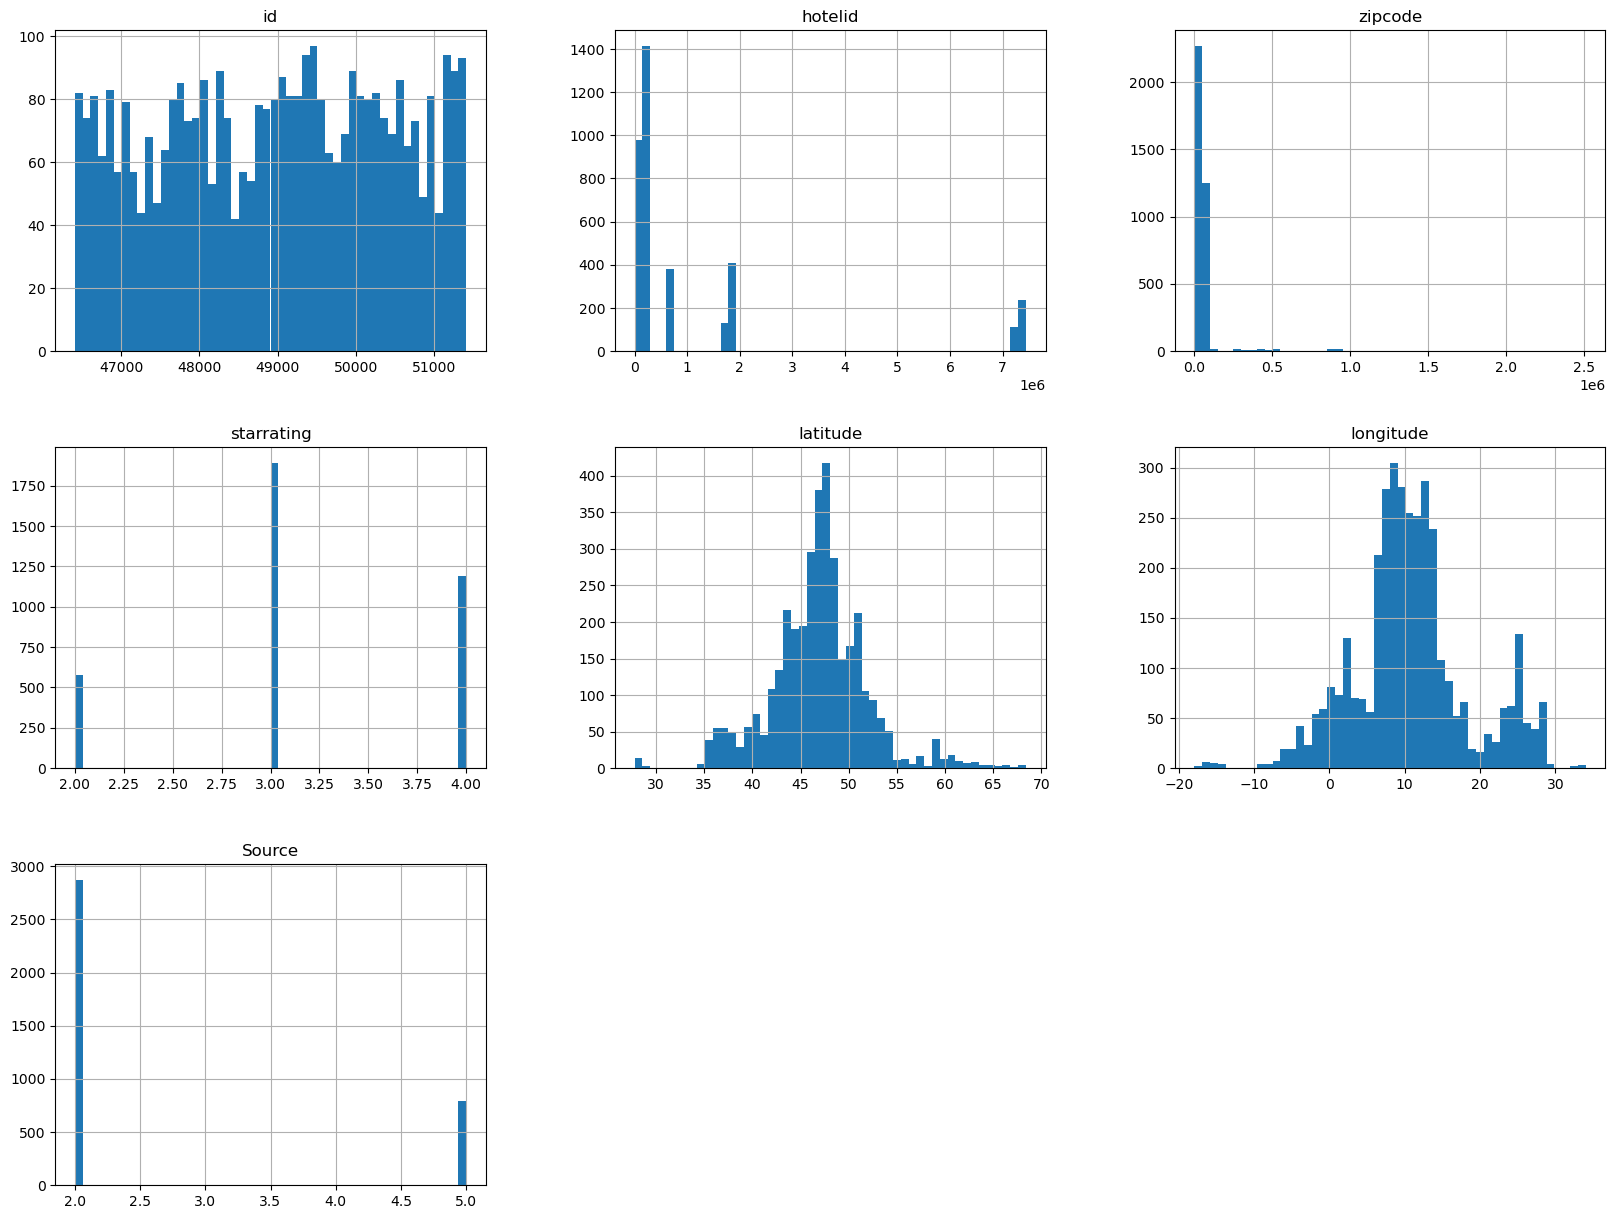

In [24]:
hotel_details_df.hist(bins=50, figsize=(20,15));

# Data Processing

In [29]:
# Combine relevant text features
hotel_details_df['combined_features'] = hotel_details_df['hotelname'] + ' ' + hotel_details_df['city'] + ' ' + hotel_details_df['country'] + ' ' + hotel_details_df['propertytype']

In [30]:
# Split data into training and testing sets
train_data, test_data = train_test_split(hotel_details_df, test_size=0.2, random_state=42)

In [31]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

In [34]:
# Fit and transform the combined features for the training data
tfidf_matrix = tfidf_vectorizer.fit_transform(train_data['combined_features'])

In [15]:
# Assuming tfidf_matrix is a sparse matrix
tfidf_matrix = csr_matrix(tfidf_matrix)

In [16]:
# Use linear_kernel for memory efficiency
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Recommender system based on city about the Hotel

In [17]:
def recommend_hotel_by_city(city, cosine_sim=cosine_sim, hotel_details_df=train_data):
    # Filter data based on the given city
    city_data = hotel_details_df[hotel_details_df['city'].str.lower() == city.lower()]

    if city_data.empty:
        return "No hotels found for the specified city '{city}'."

    # Create a sparse TF-IDF matrix for the filtered data
    tfidf_matrix_city = csr_matrix(tfidf_vectorizer.transform(city_data['combined_features']))

    # Calculate cosine similarity using linear_kernel
    cosine_sim_city = linear_kernel(tfidf_matrix_city, tfidf_matrix)

    # Get indices for the original dataset
    indices = pd.Series(hotel_details_df.index, index=hotel_details_df['id'])

    # Get the index of the first hotel in the filtered data
    idx = indices[city_data['id'].iloc[0]]
    
    if idx is None or idx >= len(cosine_sim_city):
        return f"Invalid index or out of bounds for the specified city '{city}'."

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim_city[idx]))

    # Sort hotels based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get top 5 recommendations
    hotel_indices = [i[0] for i in sim_scores[:5]]
    return hotel_details_df['hotelname'].iloc[hotel_indices]

# Print Result

In [18]:
# Example: Recommend hotels similar to city "Omis"
recommended_hotels_by_city = recommend_hotel_by_city("Omis")
print(recommended_hotels_by_city)

0        Mediteran Bungalow Galeb
1068    Resort Village T.N. Milna
4857            Mobile Home Relax
2740           Mobile Home Rojnic
3809           Adria Mobile Homes
Name: hotelname, dtype: object
